# Load Dataset

In [210]:
import pandas
from pathlib import Path
import numpy as np

In [144]:
# get absolute path
abs_path = Path.cwd()

In [145]:
abs_path

PosixPath('/mnt/c/Users/user/desktop/Project/code/Transportaion-Pipline')

In [146]:
data_address = abs_path.parent.parent / 'data/' / 'test.csv/'

In [291]:
df = pandas.read_csv(data_address)

In [148]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,A-495,4,2016-02-25 18:39:56,2016-02-26 00:39:56,38.860270,-80.657290,38.913672,-80.582080,5.475,Closed between CR-5/11/Bridge St/Exit 79 and U...,...,False,False,False,False,False,False,Night,Night,Day,Day
495,A-496,2,2016-02-25 19:36:06,2016-02-26 01:36:06,39.882030,-83.047480,39.837070,-83.094070,3.969,Between Stringtown Rd/Exit 100 and OH-665/Exit...,...,False,False,False,False,False,False,Night,Night,Night,Day
496,A-497,3,2016-02-25 19:58:08,2016-02-26 01:58:08,39.892534,-83.038786,39.874830,-83.052280,1.417,Closed between OH-104/Frank Rd/Exit 104 and St...,...,False,False,False,False,False,False,Night,Night,Night,Night
497,A-498,4,2016-02-25 20:06:42,2016-02-26 02:21:45,39.896980,-83.034280,39.844826,-83.087170,4.566,Closed between I-270/Exit 101 and OH-665/Exit ...,...,False,False,False,False,False,False,Night,Night,Night,Night


In [149]:
# if you want decisiton tree all the types must be numerical
# use map() method of pandas to map string data to numeric one
df.info()

# JUST OBJECTS should map in other type of data to create decision tree

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     499 non-null    object 
 1   Severity               499 non-null    int64  
 2   Start_Time             499 non-null    object 
 3   End_Time               499 non-null    object 
 4   Start_Lat              499 non-null    float64
 5   Start_Lng              499 non-null    float64
 6   End_Lat                499 non-null    float64
 7   End_Lng                499 non-null    float64
 8   Distance(mi)           499 non-null    float64
 9   Description            499 non-null    object 
 10  Number                 94 non-null     float64
 11  Street                 499 non-null    object 
 12  Side                   499 non-null    object 
 13  City                   499 non-null    object 
 14  County                 499 non-null    object 
 15  State 

# Decision Tree Part

In [150]:
import pandas as pd

In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [152]:
features = ['ID', 'Severity', ]

In [74]:
transfer_func = {'False' : 0, 'True' : 1}
df['Traffic_Signal'] = df['Traffic_Signal'].map(transfer_func)

In [292]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,A-495,4,2016-02-25 18:39:56,2016-02-26 00:39:56,38.860270,-80.657290,38.913672,-80.582080,5.475,Closed between CR-5/11/Bridge St/Exit 79 and U...,...,False,False,False,False,False,False,Night,Night,Day,Day
495,A-496,2,2016-02-25 19:36:06,2016-02-26 01:36:06,39.882030,-83.047480,39.837070,-83.094070,3.969,Between Stringtown Rd/Exit 100 and OH-665/Exit...,...,False,False,False,False,False,False,Night,Night,Night,Day
496,A-497,3,2016-02-25 19:58:08,2016-02-26 01:58:08,39.892534,-83.038786,39.874830,-83.052280,1.417,Closed between OH-104/Frank Rd/Exit 104 and St...,...,False,False,False,False,False,False,Night,Night,Night,Night
497,A-498,4,2016-02-25 20:06:42,2016-02-26 02:21:45,39.896980,-83.034280,39.844826,-83.087170,4.566,Closed between I-270/Exit 101 and OH-665/Exit ...,...,False,False,False,False,False,False,Night,Night,Night,Night


# Select Weather Condition


In [169]:
weather_features = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
                   'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

In [307]:
# X features and y target

X = df[weather_features]
y = df['Severity']

In [308]:
X

,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
0,42.1,36.1,58.0,29.76,10.0,10.4
1,36.9,18.1,91.0,29.68,10.0,11.2
2,36.0,18.1,97.0,29.70,10.0,11.2
3,39.0,18.1,55.0,29.65,10.0,11.2
4,37.0,29.8,93.0,29.69,10.0,10.4
...,...,...,...,...,...,...
494,32.0,22.0,85.0,28.49,6.0,15.0
495,32.2,21.4,77.0,29.96,10.0,16.1
496,32.0,21.2,73.0,29.97,10.0,16.1
497,32.0,20.8,70.0,29.97,10.0,17.3


In [315]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature(F)   499 non-null    float64
 1   Wind_Chill(F)    499 non-null    float64
 2   Humidity(%)      499 non-null    float64
 3   Pressure(in)     499 non-null    float64
 4   Visibility(mi)   499 non-null    float64
 5   Wind_Speed(mph)  499 non-null    float64
dtypes: float64(6)
memory usage: 23.5 KB


In [316]:
y

0      3
1      2
2      2
3      2
4      3
      ..
494    4
495    2
496    3
497    4
498    3
Name: Severity, Length: 499, dtype: int64

# Handling Missing Values

In [296]:
# Handling Missing Values with AVERAGE
def fill_average(feature):
    df[feature] = df[feature].fillna(round(df[feature].mean(), 1))

In [305]:
fill_average('Temperature(F)')
fill_average('Wind_Chill(F)')
fill_average('Humidity(%)')
fill_average('Pressure(in)')
fill_average('Visibility(mi)')
fill_average('Wind_Speed(mph)')

# Decision Tree

In [344]:
import pandas 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline


In [328]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [330]:
# Create
dtree = DecisionTreeClassifier()

# Train
dtree = dtree.fit(X_train, y_train)

# Test
y_pred = dtree.predict(X_test)

# Evaluating Model

In [331]:
# Accuracy, it means how often is the classifier correct?
print("Accuracy of this climatic decision tree is: ", metrics.accuracy_score(y_test, y_pred))

Accuracy of this climatic decision tree is:  0.544


# Visualizing Decision Tree

In [362]:
# Requirements: 
#    pip install graphziv
#    pip install pydotplus

In [363]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
import pydotplus

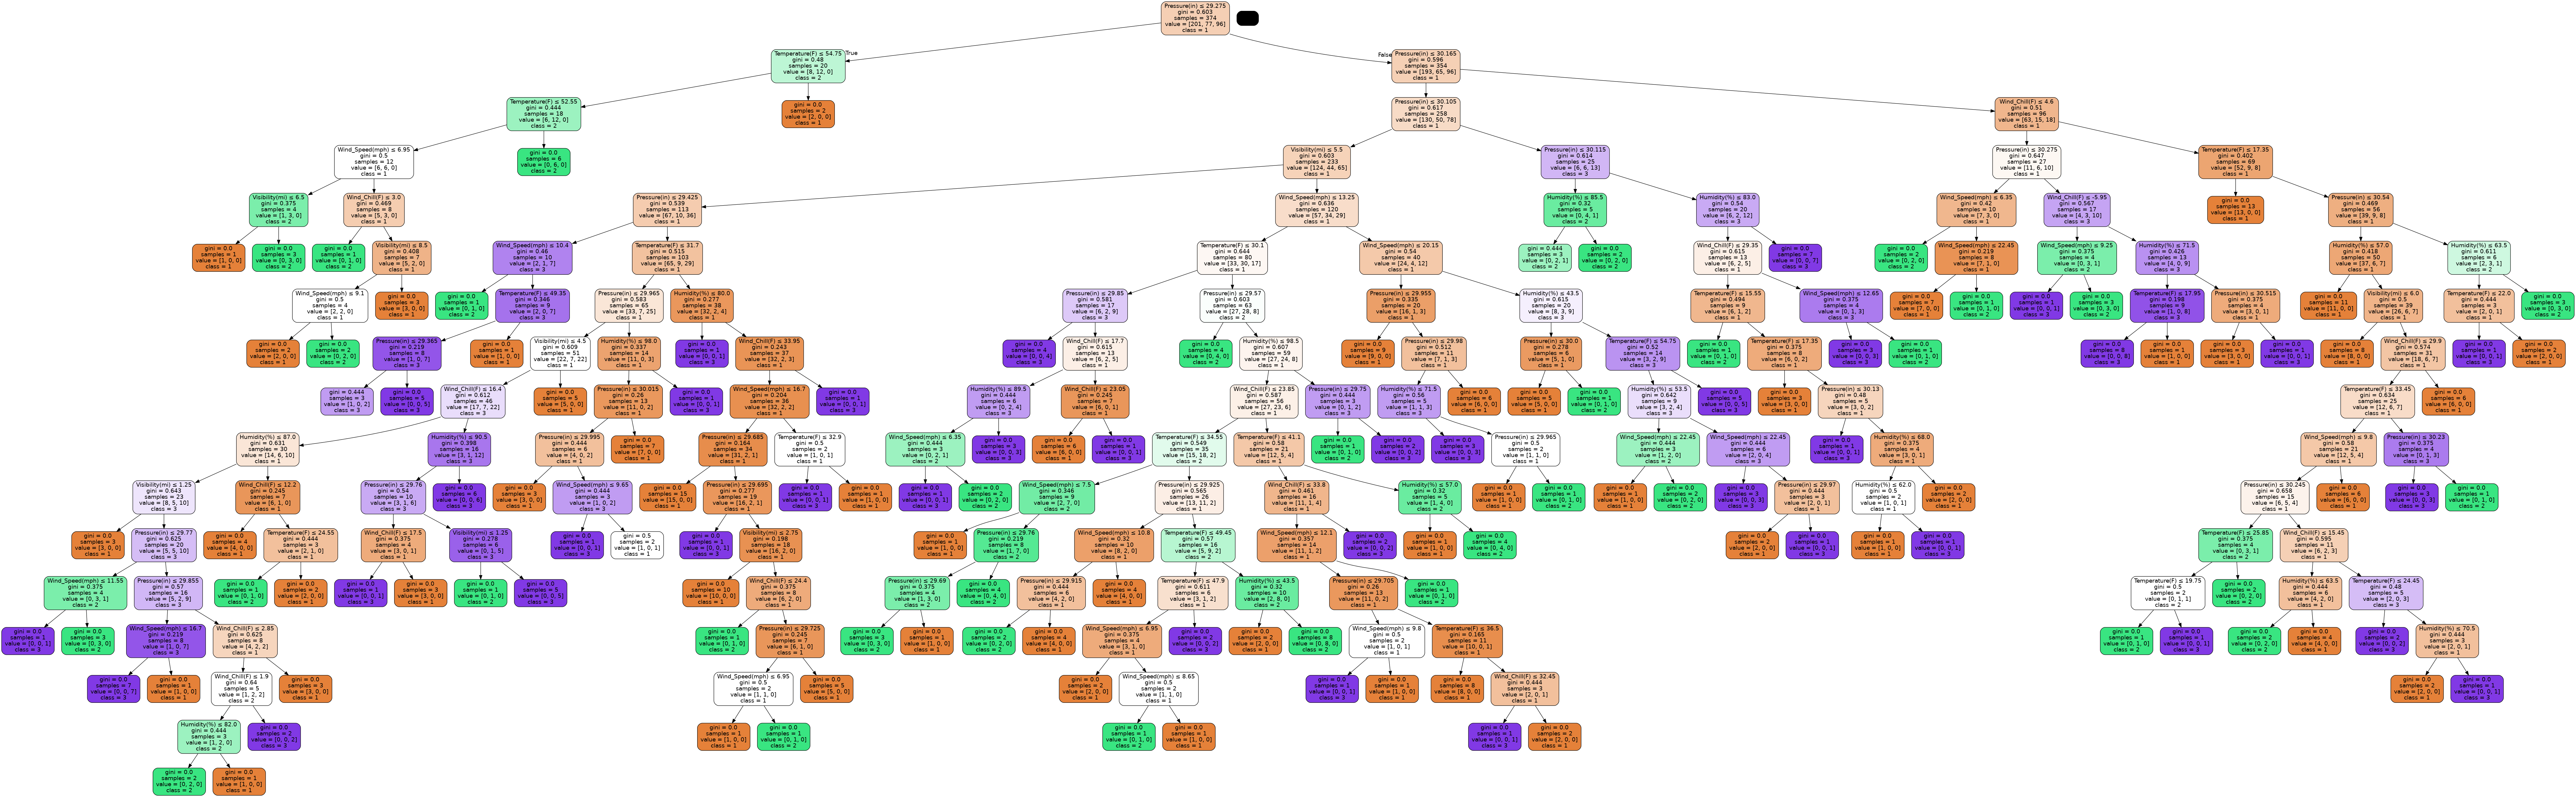

In [365]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, 
               filled=True, rounded=True,
               special_characters=True, feature_names=weather_features, class_names=['1','2','3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('dtree.png')
Image(graph.create_png())

# Optimizing Decision Tree Performance

In [366]:
# In scikit-learn, optimization of decision tree classifier performed by only pre-pruning

# criterion: gini or choose another measurement
# splitter: default = best or another split strategy
# max_depth: Maximum Depth of tree

In [367]:
# Create
dtree_opt = DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Train
dtree_opt = dtree_opt.fit(X_train, y_train)

# Test
y_pred = dtree_opt.predict(X_test)

In [368]:
# Evaluate new accuracy
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.592


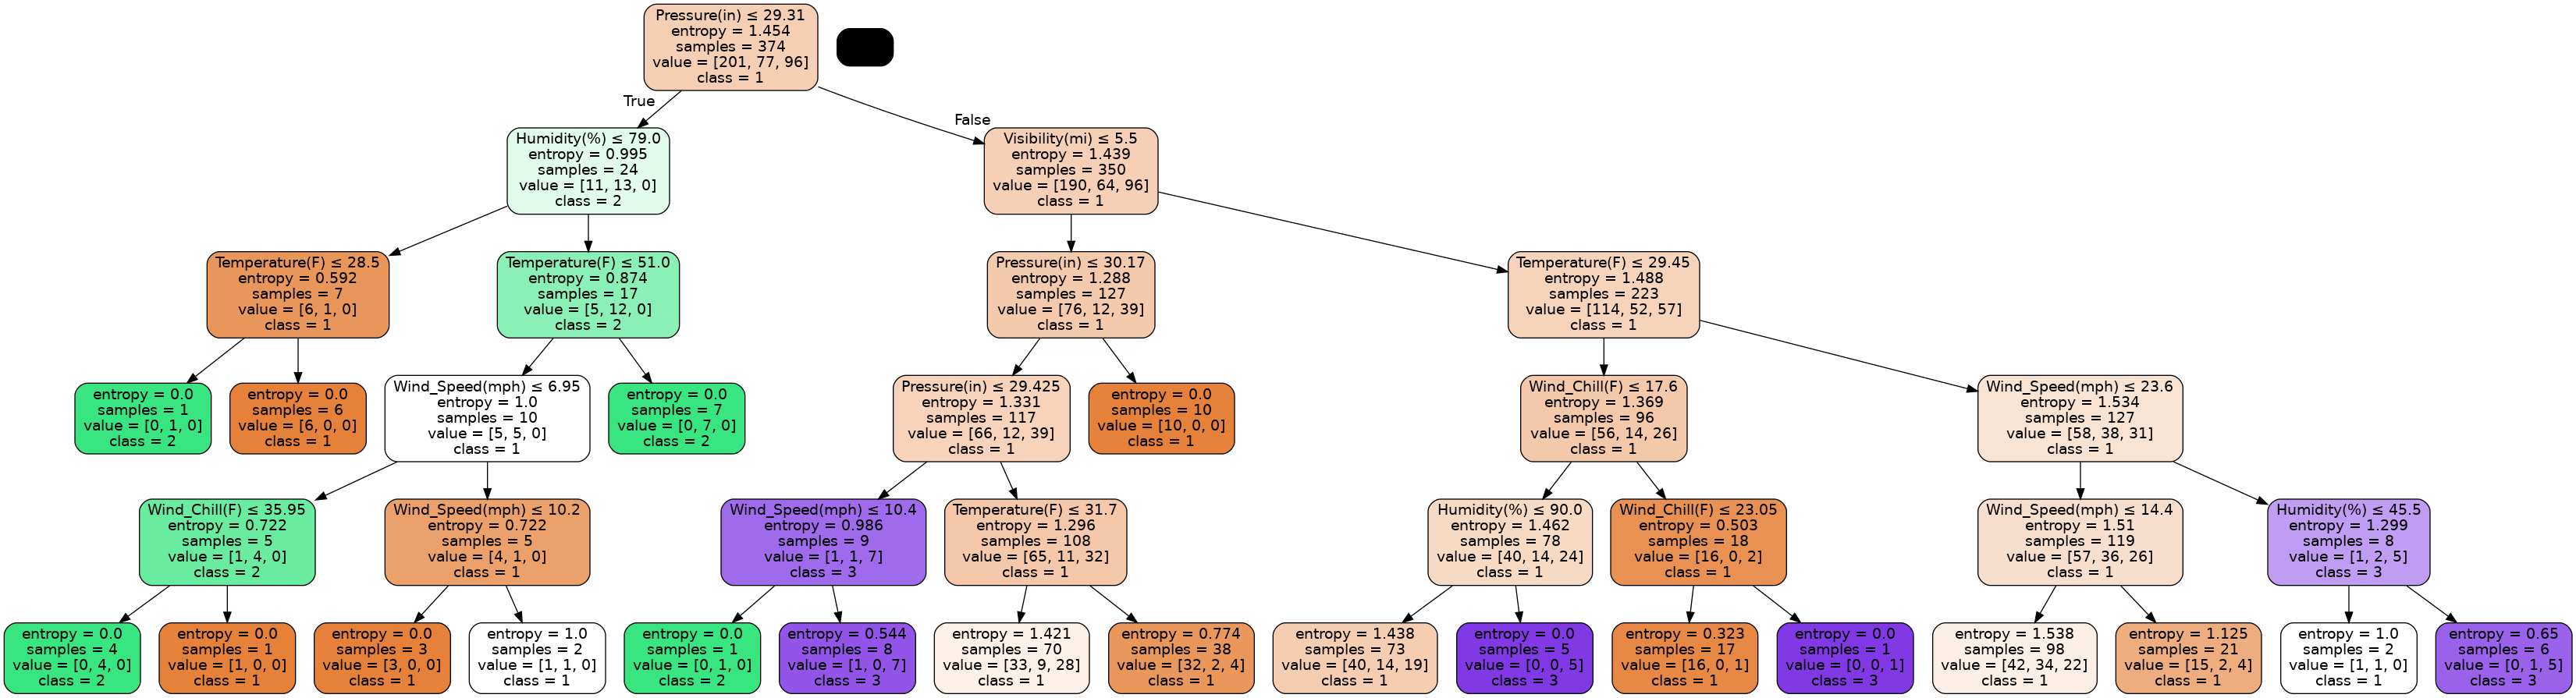

In [370]:
dot_data = StringIO()
export_graphviz(dtree_opt, out_file=dot_data, 
               filled=True, rounded=True,
               special_characters=True, feature_names=weather_features, class_names=['1','2','3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('dtree_opt.png')
Image(graph.create_png())